In [1]:
import pandas as pd
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from numpy.random import randn

from scipy import stats
from pylab import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
import random
from sklearn import linear_model
import datetime
import statsmodels.api as sm

train = pd.read_excel('train.xlsx')

df = pd.DataFrame()

In [2]:
train = train.head(2500)

df['10percentage'] = train['10percentage']
df['Salary'] = train['Salary']

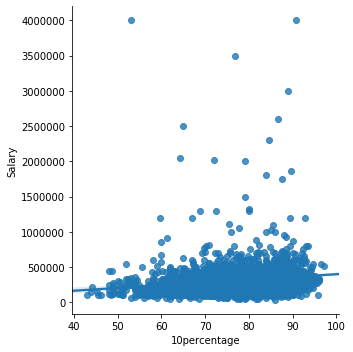

In [3]:
%matplotlib inline
sns.lmplot('10percentage', 'Salary', data=df, fit_reg=True)

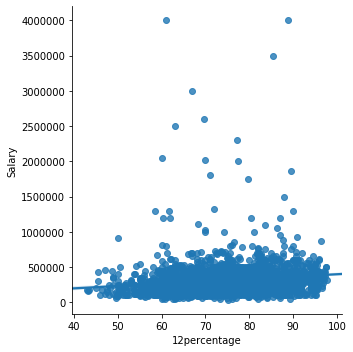

In [4]:
df['12percentage'] = train['12percentage']
df['Salary'] = train['Salary']
sns.lmplot('12percentage', 'Salary', data=df, fit_reg=True)

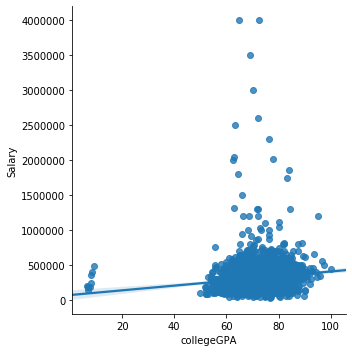

In [5]:
df['collegeGPA'] = train['collegeGPA']
df['Salary'] = train['Salary']
sns.lmplot('collegeGPA', 'Salary', data=df, fit_reg=True)

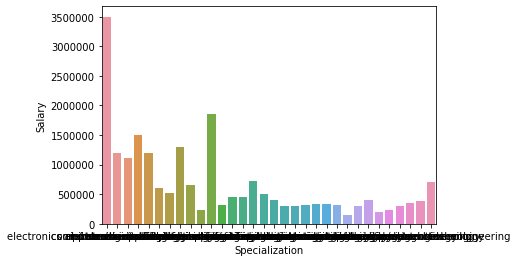

In [6]:
train = pd.read_excel('train.xlsx')
train = train.head(1000)

max_per_branch = train.groupby(['Specialization'], sort=False)['Salary'].max()

mean_per_branch = train.groupby(['Specialization'], sort=False)['Salary'].mean()

count_per_designation = train.groupby(['Designation'], sort=False)['Salary'].count()

df = pd.DataFrame()
for i in max_per_branch.index:
    df = df.append({'Specialization': i , 'Salary': max_per_branch[i] }, ignore_index=True)
    
sns.barplot(x = df['Specialization'], y = df['Salary'])

In [7]:
#from matplotlib.pyplot import pie, axis, show

#axis('equal')
#pie(count_per_designation, labels=count_per_designation.index);
#show()

In [8]:
#fig = plt.figure(figsize=(6,6), dpi=200)
#ax = plt.subplot(111)

#df.Data.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=17)

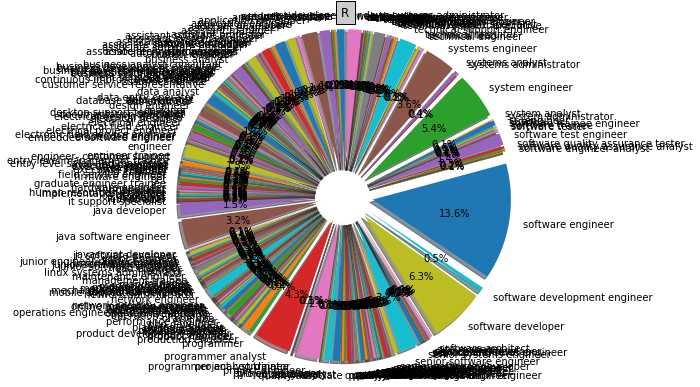

In [14]:

figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

labels = []
fracs = []
explode = []

for i in count_per_designation.index:
    labels.append(i)
    fracs.append(count_per_designation[i])
    explode.append(0.2)


pie(fracs, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
                

title('R', bbox={'facecolor':'0.8', 'pad':5})

show()

In [10]:
labels.__len__()

218

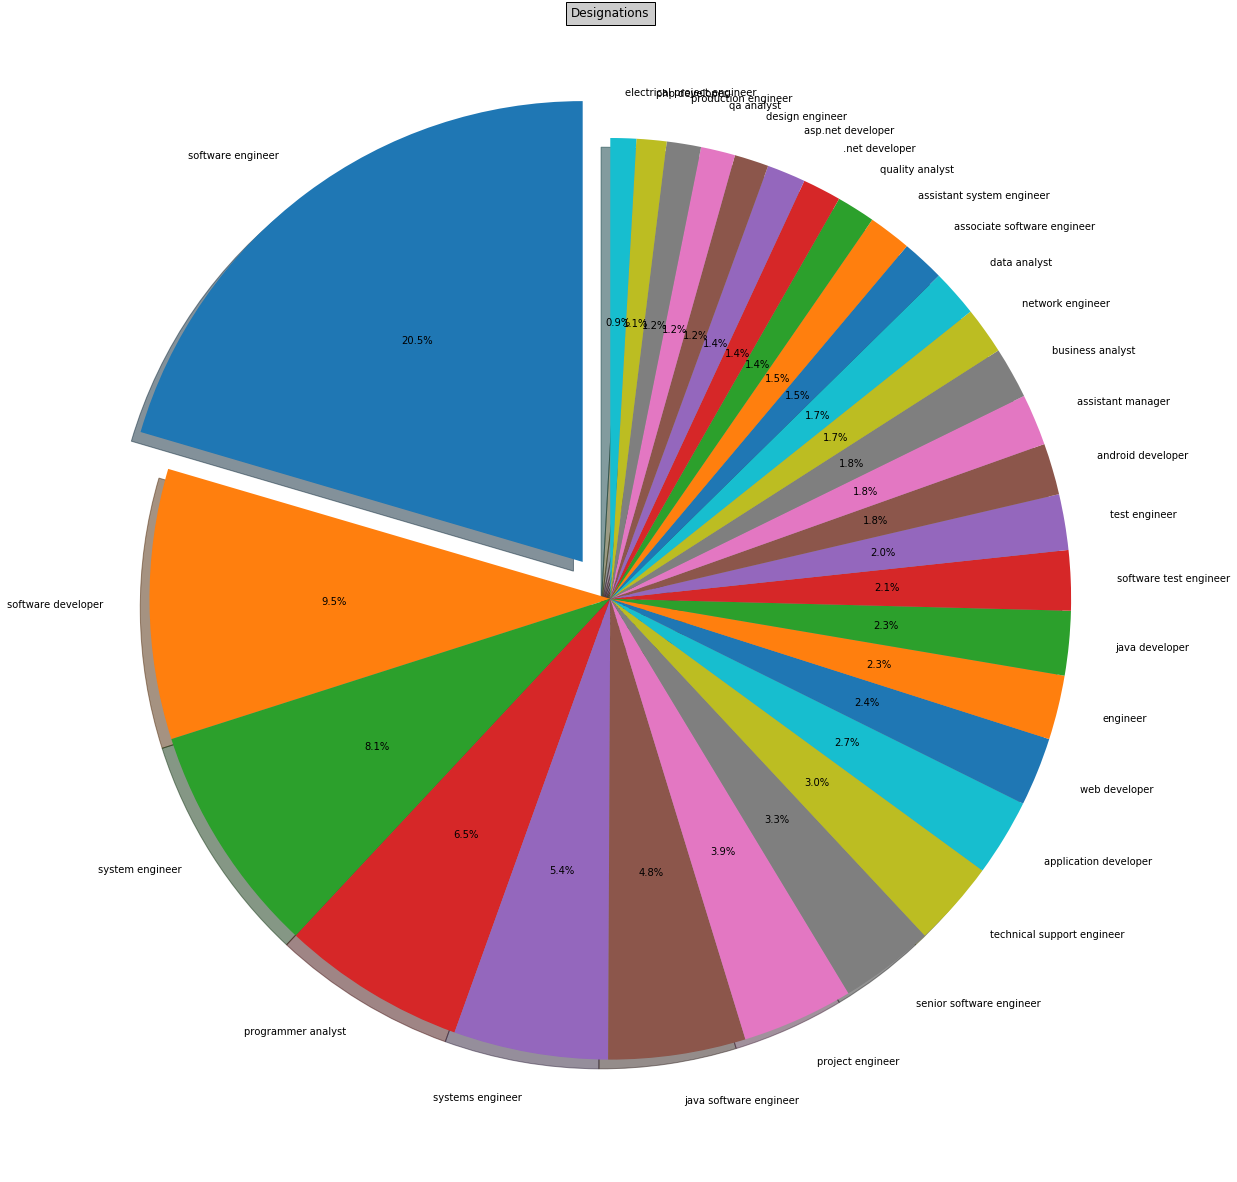

In [11]:
count_per_designation = train.groupby(['Designation'], sort=True)['Salary'].count()

df = pd.DataFrame()
for i in count_per_designation.index:
    df = df.append({'Designation': i , 'Count': count_per_designation[i] }, ignore_index=True)
    
df.sort_values(by='Count', axis=0, ascending=False, inplace=True)

data = df.head(30)
remaining = df.tail(len(df) - 30)

temp = 0.0

for i in remaining.Count.values:
    temp = temp + i


figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

labels = []
fracs = []
explode = []

for index, row in data.iterrows():
    labels.append(row['Designation'])
    fracs.append(row['Count'])
    if row['Designation']=="software engineer":
        explode.append(0.1)
    else:
        explode.append(0)

    

pie(fracs, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
               

title('Designations', bbox={'facecolor':'0.8', 'pad':5})
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 20,forward=True)
fig.savefig('count_per_branch.png', dpi=250)

show()

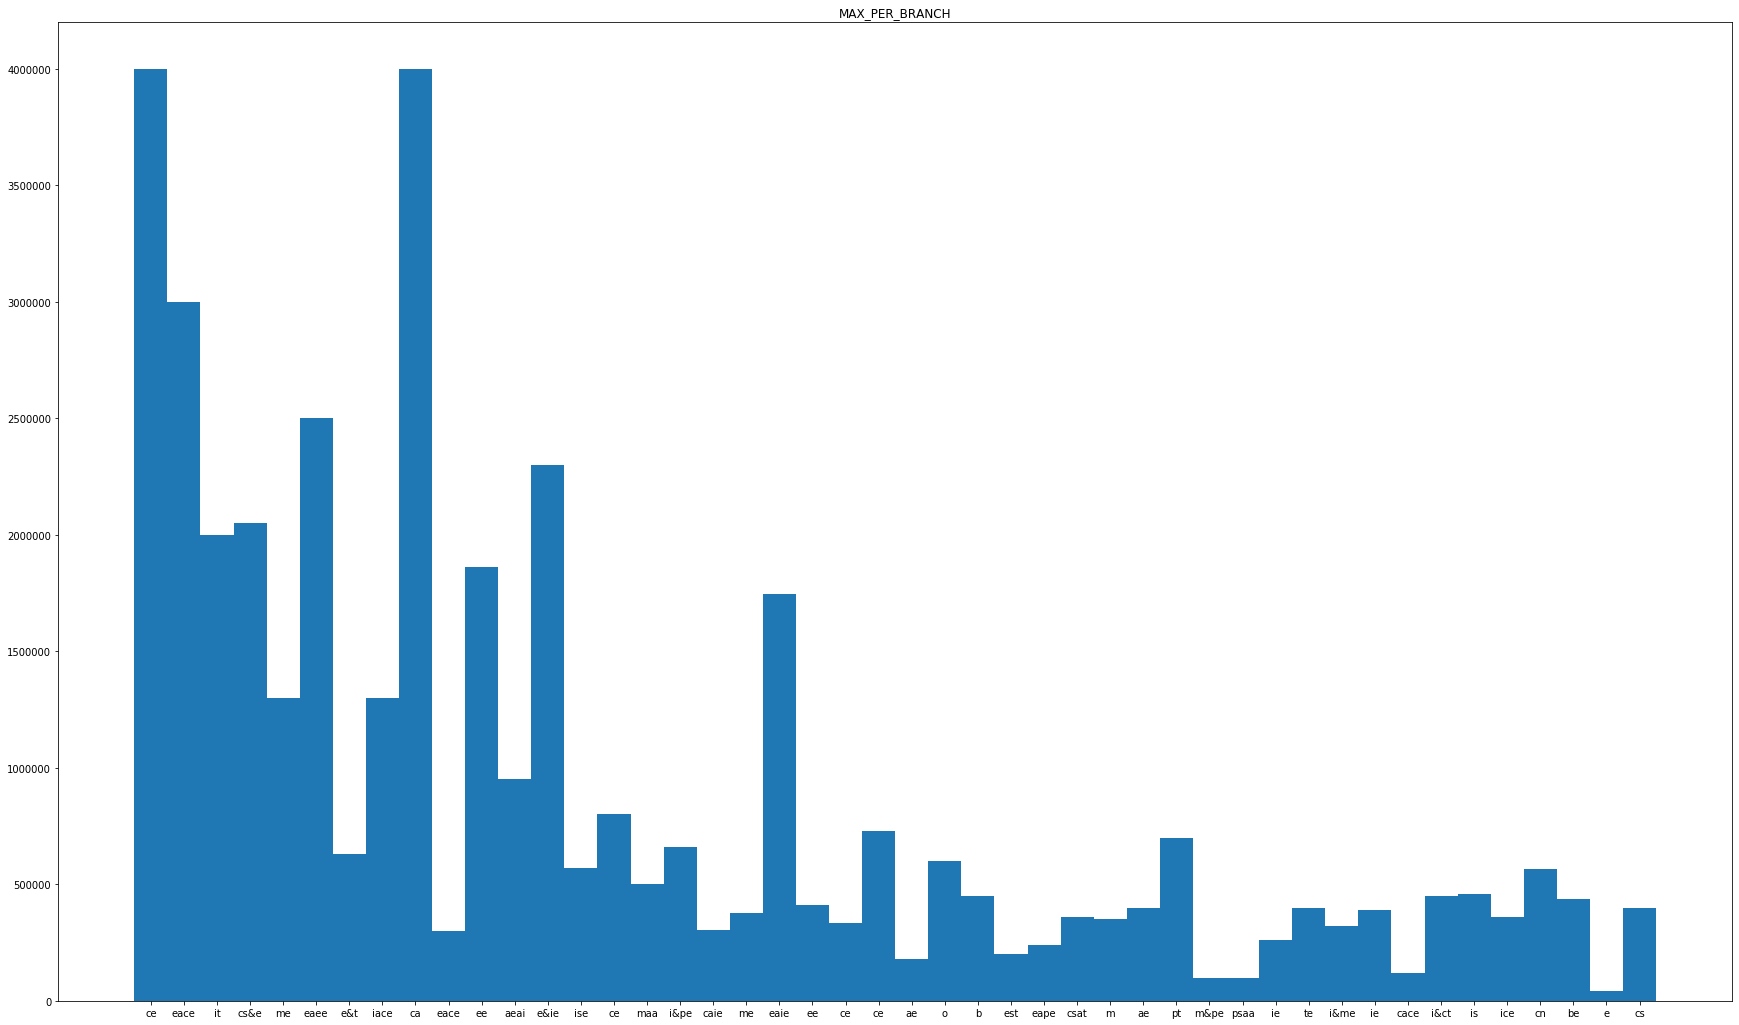

In [12]:
train = pd.read_excel('train.xlsx')

max_per_branch = train.groupby(['Specialization'], sort=False)['Salary'].max()


df = pd.DataFrame()
for i in max_per_branch.index:
    df = df.append({'Specialization': i , 'Salary': max_per_branch[i] }, ignore_index=True)

x = range(1, 47)
y = np.array(df.Salary.values)
LABELS = []
for str in df.Specialization.values:
    LABELS.append("".join(e[0] for e in str.split()))

plt.bar(x, y,width = 1.0, align='center')
plt.xticks(x, LABELS)
plt.title('MAX_PER_BRANCH')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(30, 18,forward=True)
fig.savefig('max_per_branch.png', dpi=250)
plt.show()
# LABELS

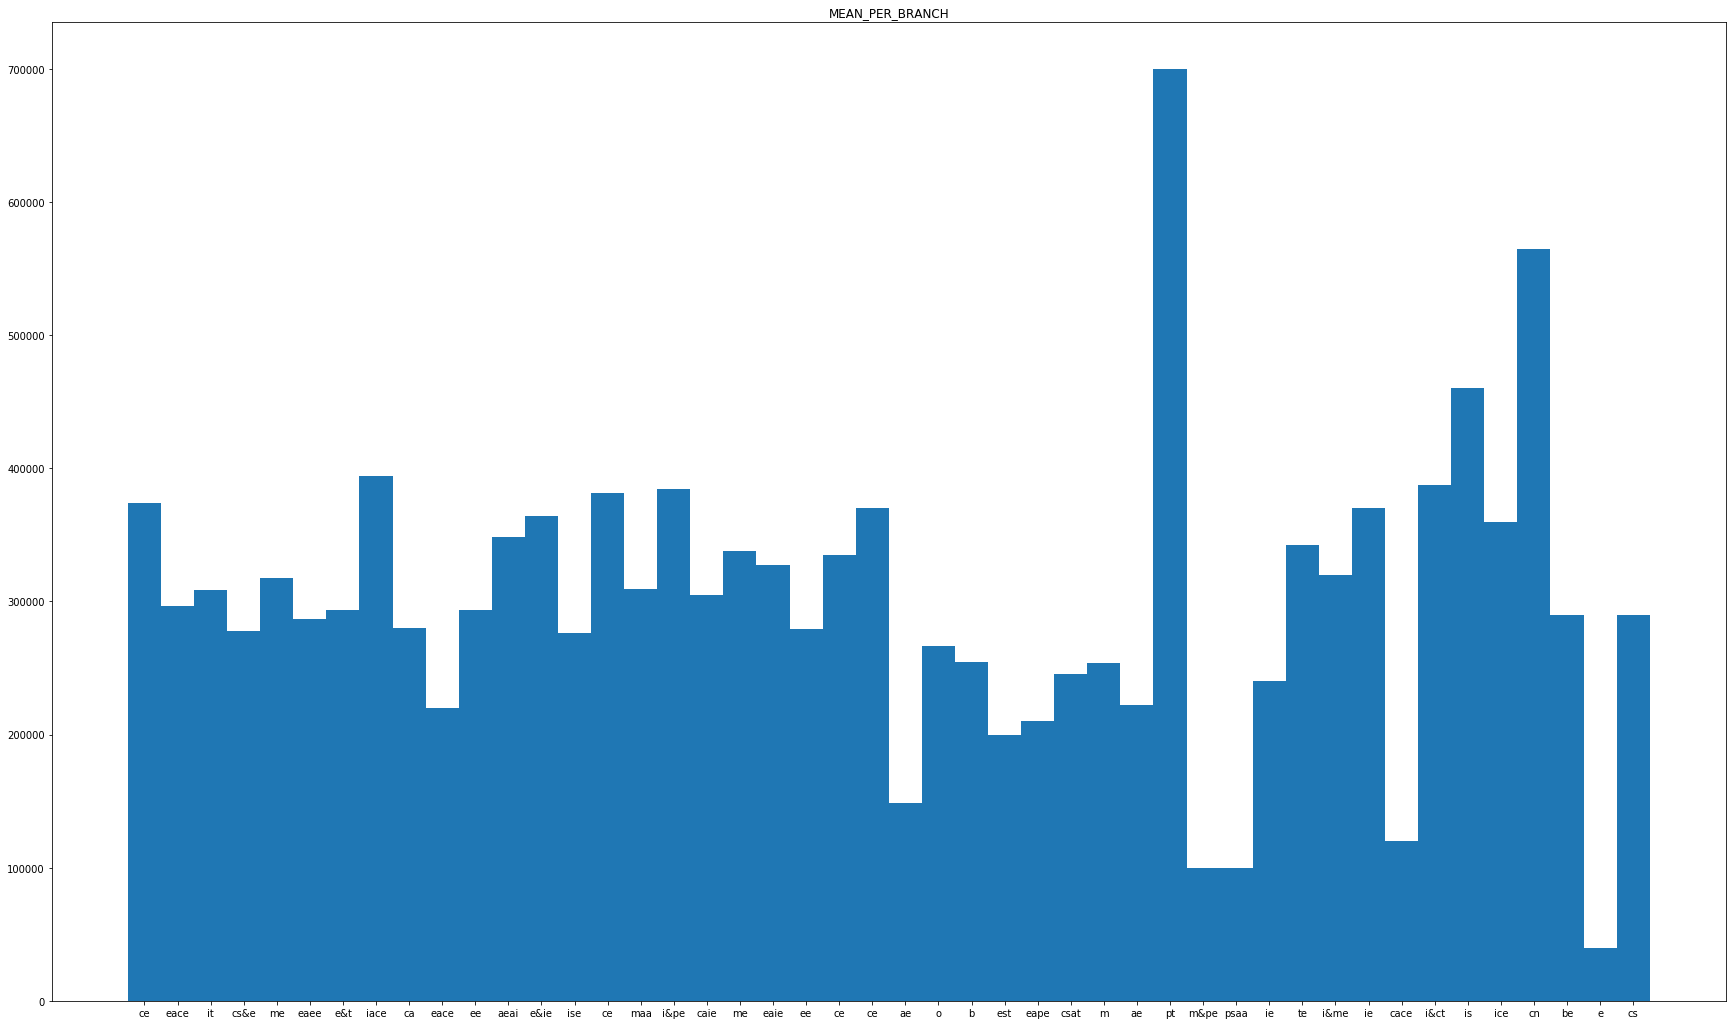

In [13]:
mean_per_branch = train.groupby(['Specialization'], sort=False)['Salary'].mean()
df = pd.DataFrame()
for i in mean_per_branch.index:
    df = df.append({'Specialization': i , 'Salary': mean_per_branch[i] }, ignore_index=True)

x = range(1, 47)
y = np.array(df.Salary.values)

LABELS = []
for str in df.Specialization.values:
    LABELS.append("".join(e[0] for e in str.split()))
# LABELS = np.array(df.Specialization.values)
plt.bar(x, y,width = 1.0, align='center')
plt.xticks(x, LABELS)
plt.title('MEAN_PER_BRANCH')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(30, 18,forward=True)
fig.savefig('mean_per_branch', dpi=250)
plt.show()